# Assignment 1: Exercises 2.1-2.3
Aaron Ou | 2018-02-06

**Exercise 2.1**: From the regression output in Figure 4, state the relationship between income and
years of education – is it increasing or decreasing, and at what rate? Also assess whether this association
is statistically significant. Comment on whether you would conclude that more education causes
increase in the income levels of individuals.
![](https://i.imgur.com/iQvShWQ.png)

For each additional year of education, income is increasing by $91.984. Since the p-value is very low (<2e-16), we can say that the association is statistically significant.
We are confident to say eduation correlates positively to the increase in income, but correlation is not causal effect.

**Exercise 2.2**: Copy and run the following command text in R. We will be asking R to draw different
distributions using functions from the ggplot2 and stats packages. You should use the help command
(?) for these commands and the distribution functions to better understand them. Although these
commands are not necessary for effective policy evaluation, they provide good practice of the R skills
we have been building throughout this course.

In [1]:
library(ggplot2)
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width = 4, repr.plot.height = 3)

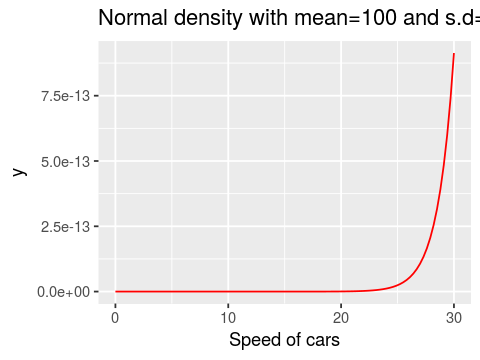

In [2]:
# NORMAL DISTRIBUTION
normal <- ggplot(data.frame(x = c(80, 120)), aes(x)) +
 stat_function(fun = dnorm, args = list(mean = 100, sd = 10), colour = "red") + 
 scale_x_continuous(name="Speed of cars", limits=c(0, 30)) +
 ggtitle("Normal density with mean=100 and s.d=5")

normal

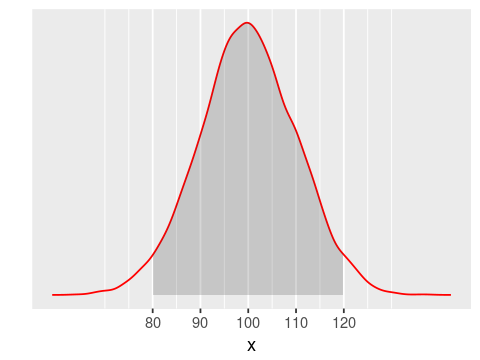

In [3]:
# Another way
set.seed(1)
df <- with(density(rnorm(10000, mean = 100, sd = 10)), data.frame(x, y))
 
ggplot(df, aes(x = x, y = y)) + geom_line(color = "red") +
  geom_area(data = subset(df, x > 80 & x <120), alpha = 0.2) +
  scale_x_continuous(breaks = seq(80, 120, 10)) +
  ylab("") + scale_y_continuous(breaks = NULL)

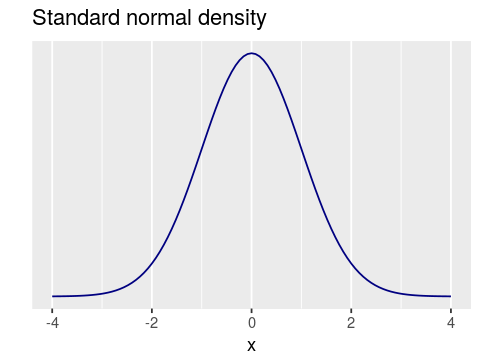

In [4]:
# STANDARD NORMAL DISTRIBUTION
std_normal <- ggplot(data.frame(x = c(-4, 4)), aes(x)) +
 stat_function(fun = dnorm, args = list(mean = 0, sd = 1), colour = "navy") + ylab("") +
 scale_y_continuous(breaks = NULL) +
 ggtitle("Standard normal density")

std_normal

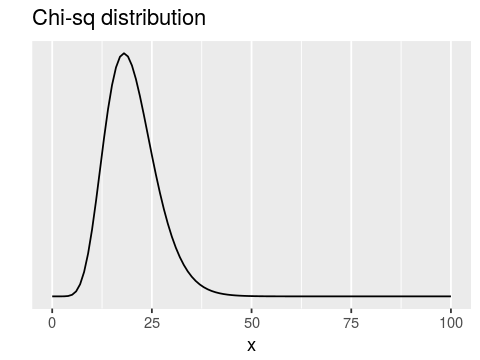

In [5]:
# CHI-SQUARE DISTRIBUTION
chisq <- ggplot(data.frame(x = c(0, 100)), aes(x)) +
  stat_function(fun = dchisq, args = list(df = 20), colour = "black") +
  ylab("") +
  scale_y_continuous(breaks = NULL) +
  ggtitle("Chi-sq distribution")

chisq

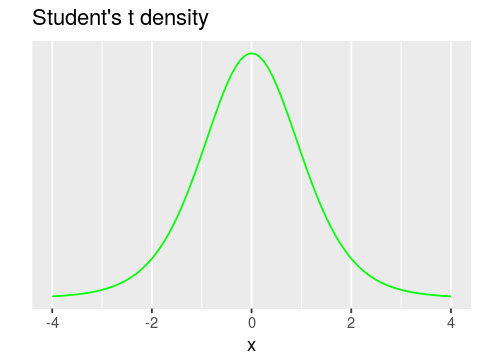

In [6]:
# STUDENTS T DISTRIBUTION
students_t <- ggplot(data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dt, args = list(df = 8), colour = "green") +
  ylab("") +
  scale_y_continuous(breaks = NULL) +
  ggtitle("Student's t density")

students_t

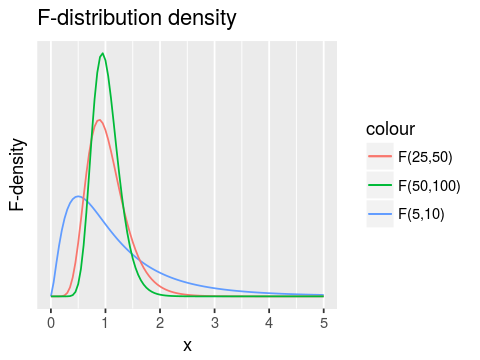

In [7]:
# F-DISTRIBUTION
# Note: add quotes, fun = "df" rather than fun = df
f <- ggplot(data.frame(x = c(0, 5)), aes(x)) +
  stat_function(fun = "df", args = list(df1 = 5, df2 = 10), aes(colour = "F(5,10)")) +
  stat_function(fun = "df", args = list(df1 = 25, df2 = 50), aes(colour = "F(25,50)")) +
  stat_function(fun = "df", args = list(df1 = 50, df2 = 100), aes(colour = "F(50,100)")) +
  ylab("F-density") +
  scale_y_continuous(breaks = NULL) +
  ggtitle("F-distribution density")
  
f

**Exercise 2.3**: Load EPH_2006.csv. Run a t-test to assess if the income is different by sex of the person in R.
Follows the 4 steps described above and interpret the findings.

In [8]:
d <- read.csv("../Data/EPH_2006.csv")
str(d)

'data.frame':	49663 obs. of  6 variables:
 $ id      : int  1 1 2 2 3 4 4 4 5 5 ...
 $ age     : int  55 26 34 37 24 47 21 29 47 22 ...
 $ male    : int  0 0 1 0 0 0 1 1 0 1 ...
 $ eduyears: num  14 14 12.5 17 12.5 12.5 17 17 17 17 ...
 $ employed: int  1 1 1 1 1 1 1 1 1 1 ...
 $ income  : int  1000 1200 NA NA 150 300 930 930 590 900 ...


### Step 1: Specify null hypothesis and alternative hypothesis
H0：Sex of the person has no effect on the income.<br>
H1: Sex of the person has effect on the income.

### Step 2: Decide statistical significance levels
90%

### Step 3: Calculate t-statistic and its distribution
Under H0, we expect t-statistic to be zero.

In [9]:
t_values <- t.test(income ~ male, data = d, var.equal = T)
t_values


	Two Sample t-test

data:  income by male
t = -29.284, df = 44038, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -356.7625 -312.0019
sample estimates:
mean in group 0 mean in group 1 
       923.1541       1257.5363 


In [10]:
str(t_values)

List of 9
 $ statistic  : Named num -29.3
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 44038
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.02e-186
 $ conf.int   : atomic [1:2] -357 -312
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 923 1258
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr " Two Sample t-test"
 $ data.name  : chr "income by male"
 - attr(*, "class")= chr "htest"


A two-sided t-test at 10% significance level, the critical t-value under the degress of freedom above would be:

In [11]:
round(qt(0.95, t_values$parameter), 2) #5% on either side

[1] 1.64

 or

In [12]:
round(qt(0.05, t_values$parameter), 2)

[1] -1.64

### Step 4: Compare t-statistic with the reference distribution

In [13]:
print(paste0("The calculated t-value is ", round(t_values$statistic, 2), 
             ", smaller than the critical t-value ",
             round(qt(0.05, t_values$parameter), 2)) 
      )

[1] "The calculated t-value is -29.28, smaller than the critical t-value -1.64"


In [14]:
paste0(round(t_values$statistic, 2), " < ", round(qt(0.05, t_values$parameter), 2))

[1] "-29.28 < -1.64"

Therefore, we reject the null hypothesis. It implies that sex of the person has effect on income.